In [27]:
import scanpy as sc
import anndata as ad

In [76]:
ood_split = split = 5
adata_cf = sc.read(f"/lustre/groups/ml01/workspace/ot_perturbation/models/otfm/sciplex/pca_attention_pooling/adata_ood_with_predictions_{split}.h5ad")
adata_biolord = sc.read(f"/lustre/groups/ml01/workspace/ot_perturbation/data/sciplex/biolord_output_ood_{ood_split}.h5ad")
adata_condot = sc.read_h5ad(f"/lustre/groups/ml01/workspace/ot_perturbation/models/condot/sciplex/adata_ood_with_predictions_{split}.h5ad")
adata_chemcpa = sc.read_h5ad(f"/lustre/groups/ml01/workspace/ot_perturbation/data/sciplex/chemcpa/adata_chemcpa_split_{ood_split}_pred_ood.h5ad")
adata_true = sc.read_h5ad(f"/lustre/groups/ml01/workspace/ot_perturbation/data/sciplex/adata_ood_{split}.h5ad")
adata_id = sc.read_h5ad(f"/lustre/groups/ml01/workspace/ot_perturbation/data/sciplex/adata_train_{split}.h5ad")

In [78]:
adata_cf.X = adata_cf.layers["X_recon_pred"]
adata_condot.X = adata_condot.layers["X_recon_pred"]
adata_chemcpa.obs["dose_adapted"] = adata_chemcpa.obs.apply(lambda x: 0.0 if x["dose"]==1.0 else x["dose"], axis=1)
adata_chemcpa.obs["condition"] = adata_chemcpa.obs.apply(lambda x: x["cell_line"]+ "_"+x["perturbation"]+"_"+str(x["dose_adapted"]), axis=1)


In [79]:
adata_cf.var_names = adata_true.var_names
adata_biolord.var_names = adata_true.var_names
adata_condot.var_names = adata_true.var_names
adata_chemcpa.var_names = adata_true.var_names


In [80]:
adata_cf = adata_cf[adata_cf.obs["condition"]=='MCF7_Dacinostat_(LAQ824)_10000.0']
adata_id = adata_id[(adata_id.obs["drug"]=="Vehicle") & (adata_id.obs["cell_type"]=="MCF7")]
adata_biolord = adata_biolord[adata_biolord.obs["condition"]=='MCF7_Dacinostat_(LAQ824)_10000.0']
adata_chemcpa = adata_chemcpa[adata_chemcpa.obs["condition"]=='MCF7_Dacinostat_(LAQ824)_10000.0']
adata_condot = adata_condot[adata_condot.obs["condition"]=='MCF7_Dacinostat_(LAQ824)_10000.0']
adata_true = adata_true[adata_true.obs["condition"]=='MCF7_Dacinostat_(LAQ824)_10000.0']

In [81]:
adata_cf.obs["model"] = "CellFlow"
adata_id.obs["model"] = "Identity"
adata_biolord.obs["model"] = "BioLord"
adata_chemcpa.obs["model"] = "ChemCPA"
adata_condot.obs["model"] = "CondOT"
adata_true.obs["model"] = "True"

/tmp/ipykernel_3447137/1445842805.py:1: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  adata_cf.obs["model"] = "CellFlow"
/tmp/ipykernel_3447137/1445842805.py:2: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  adata_id.obs["model"] = "Identity"
/tmp/ipykernel_3447137/1445842805.py:3: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  adata_biolord.obs["model"] = "BioLord"
/tmp/ipykernel_3447137/1445842805.py:4: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  adata_chemcpa.obs["model"] = "ChemCPA"
/tmp/ipykernel_3447137/1445842805.py:5: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  adata_condot.obs["model"] = "CondOT"
/tmp/ipykernel_3447137/1445842805.py:6: ImplicitModificationWarning: Trying to modify attribute `.ob

In [82]:
bdata = ad.concat((adata_true, adata_id, adata_cf, adata_biolord, adata_chemcpa, adata_condot))

/home/icb/dominik.klein/mambaforge/envs/cfp/lib/python3.11/site-packages/anndata/_core/anndata.py:1818: UserWarning: Observation names are not unique. To make them unique, call `.obs_names_make_unique`.
  utils.warn_names_duplicates("obs")


In [83]:
upregulated_genes = ["ACSBG1", "COL26A1", "LINC00624", "MALAT1", "PPM1E", "RPL3L", "TEX14"]
downregulated_genes = ["SULF2", "SLC24A3", "PLXDC2", "MALRD1", "GFRA1", "DSCAM"]

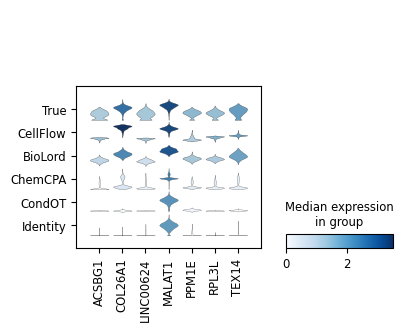

In [88]:
sc.pl.stacked_violin(bdata, upregulated_genes, groupby='model', categories_order=["True", "CellFlow", "BioLord", "ChemCPA", "CondOT", "Identity"])

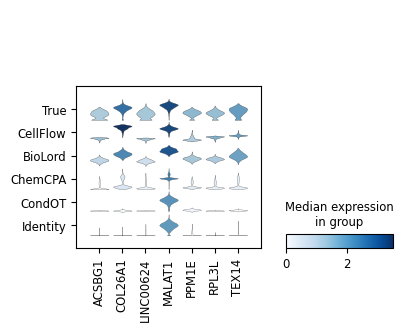

In [89]:
sc.pl.stacked_violin(bdata, upregulated_genes, groupby='model', categories_order=["True", "CellFlow", "BioLord", "ChemCPA", "CondOT", "Identity"])